In [81]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import json

In [99]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in years for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in miles for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement  in year t
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005,'corridor_length':120}
#overhead_line={'underground':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'underground':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# underground= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
# corridor_length= length of the corridor in feet
###

In [100]:
#shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
#print(shape_age_x)

In [101]:
#scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
#print(scale_age_x)

In [102]:
#x = np.linspace(0, 20, 20)
#y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

#plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
#plt.legend(loc='upper right')

In [103]:
#shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating line circuits lengths
#print(shape_length_x)

In [104]:
#scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
#print(scale_length_x)

In [105]:
#x = np.linspace(0, 20, 20)
#y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

#plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
#plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

In [106]:
#age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
#plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
#plt.show()
#print (age)
#Randomly determined circuit's ages in the base year

In [107]:
#lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
#plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5,bins=50)
#plt.show()
#print (lengths)
#Randomly determined circuit's lengths in the base year

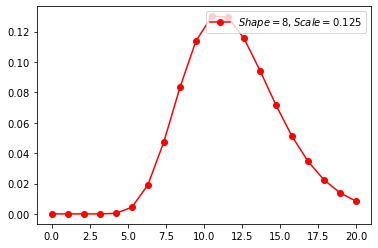

In [108]:
age_shape=10
age_scale=2
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths
#Age_shape*Age_scale=age_average_x=20

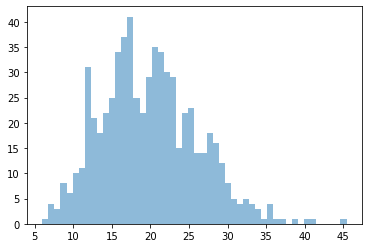

[19.96472228 16.02459834 23.61082179 16.95635928 16.10045744 22.56806419
 19.13661367 19.87881335 21.73441491 25.19717434 15.68025225 37.09487795
 21.27542246 30.06619855 19.13789939 28.09420105 17.68985787 13.50924722
 21.17189982 19.07585871 13.69086402 12.31040504 28.41924583 18.88444412
 12.40708573 14.94262318 13.07170235 15.52384567 18.82921398 13.16454239
 20.93412408 13.94810034 10.79024815 18.25840947 18.6231132  27.39483236
 21.48269244 17.70881615 19.8691404  23.91642422 17.31954211 20.67247395
 25.1342331  14.30432694 12.68697395 25.35784959 32.92800242 25.95931785
 17.2661713  18.70108043 30.16652986 10.34268391 19.83457829 19.804724
 22.48034981 27.59071731 18.31456724 21.98895244 11.66631375 14.02619357
 19.61278958  9.93077454 13.47790111 16.26006724 10.71744966 15.51490884
 27.73971326 34.88105407 11.16424141 21.92789307 15.40490006 20.80626652
 11.35737301 25.81787308 13.5186106  13.71719844 19.41043542 12.10829646
 26.14168911 24.00506301 24.99648707 20.88185189 16.3

In [109]:
age=np.random.gamma(age_shape,age_scale,number_circuit)
plt.hist(np.random.gamma(age_shape,age_scale,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

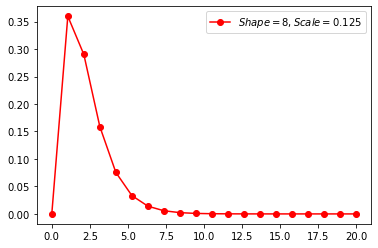

In [110]:
length_shape=2
length_scale=0.25
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths
#length_shape*length_scale=length_average_x=0.5

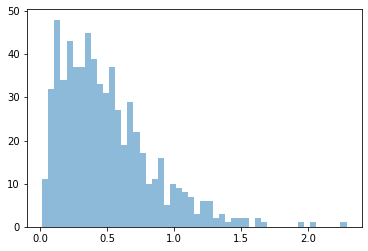

[0.33987229 0.0804672  0.389653   0.21655454 0.51837686 0.47226462
 1.25073566 1.05775841 0.5359682  0.40665962 0.19818992 0.25398525
 0.1119382  0.11072243 0.40129611 0.37616065 0.3078766  0.78989854
 0.21587799 0.04686296 1.22480167 0.51131717 0.51745476 0.85427811
 0.84924905 0.77174506 0.38726413 0.39616969 0.1986106  0.36612316
 0.10931168 0.25669125 0.2369383  0.438897   0.56604518 0.14293001
 0.44281446 0.42943992 0.62119829 0.45349372 0.55301868 0.37736943
 0.63212271 0.71274879 0.77267007 0.06736684 0.03484233 0.60385583
 0.17609832 0.19400312 0.17703342 0.14797356 1.13525157 0.50304542
 0.17260685 0.43467162 0.83519542 0.23866279 0.12935517 0.62392564
 0.30082769 0.12883405 0.12546965 0.65426747 0.22836118 0.22415899
 1.8553211  0.34207036 0.37192655 0.1989889  0.16680364 0.97271318
 0.51918658 0.85511278 0.57157487 0.40127967 0.35090792 0.91047467
 0.33248166 0.46217085 0.6675158  1.42040863 0.4593823  0.29095728
 0.34708831 0.7557604  0.46407675 0.34372345 1.7780577  0.3013

In [111]:
length=np.random.gamma(length_shape,length_scale,number_circuit)
plt.hist(np.random.gamma(length_shape,length_scale,number_circuit),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [112]:
#Defining Circuit class with a new approach: ommiting for t from --- to --- from class methods.
###I still do not know without using for loop, how I can manage to generate some of the required outputs.
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[0]
        self.underground_length_new=[0]
        #if self.underground[0]==1:
            #self.underground_length_new=[self.length]
        #else:
            #self.underground_length_new=[0]
        self.environmental_restoration=[0]
        self.underground_total=[0]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']*((1+replcost_growth_rate_x)**(len(self.age)-1))
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    def opex_calculation(self):
        underground=self.underground[-1]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
        length=self.length
        #self.add_replcost_intrest_rate()
        replcost_rate=self.replcost_rate[-1]
        opex_new=(om_percentage_replcost)*(length)*(replcost_rate)
        self.opex.append(opex_new)
        return(self.opex)
    #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def get_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
    #Determining the first retirement year Under the undergrounding alternative
    def underground_length_new_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual underground line mileage
    def underground_length_total_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual new underground line mileage
      
    
    ###Environmental Costs:
    def environmental_restoration_calculation(self):
        if self.underground[0]==0:
            corridor_length=overhead_line['corridor_length']
        else:
            corridor_length=underground_line['corridor_length']
        self.environmental_restoration.append((self.underground_length_new[-1])*(corridor_length)*640/5280*easment_value)
        return(self.environmental_restoration)
    #Determining environmental restoration costs based on the length of new underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    
    ###Safety and health Costs:
    def non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    def fatal_cost(self):
        return(fir*employees/100000*vsl)
        

In [113]:
###Testing the results
#for i in range (number_circuit):
    #circuit_i=Circuit(age_shape, age_scale, length_shape, length_scale, 0.66)
    #print(circuit_i.get_underground_baseyear())
    #print(circuit_i.get_age_baseyear())
    #print(circuit_i.get_length())
    #print(circuit_i.get_first_retire())
    #for t in range (50):
        #circuit_i.add_age()
        #circuit_i.add_replcost_intrest_rate()
        #circuit_i.capex_calculation()
        #circuit_i.opex_calculation()
        #circuit_i.underground_length_new_array()
    #underground_array=np.array(circuit_i.get_underground_array())
    #age_array=np.array(circuit_i.get_age_array())

    #underground=circuit_i.get_underground_array()
    #age=circuit_i.get_age_array()
    #length=circuit_i.underground_length_new
    #replace_rate=circuit_i.replcost_rate
    #capex=circuit_i.capex
    #opex=circuit_i.opex

#arrays=[range(650),underground,age,length,replace_rate,capex,opex]
#df=pd.MultiIndex.from_arrays(arrays,names=['numbers','underground','age','length','replace_rate','capex','opex'])
#df
#file_name='database.json'
#with open (file_name,'w') as f:
    #json.dump(age,length,replace_rate,capex, opex, f)
    #print(circuit_i.get_underground_array())
    #print(circuit_i.get_age_array())
    #print(circuit_i.underground_length_new)
    #print(circuit_i.replcost_rate)
    #print(circuit_i.capex)
    #print(circuit_i.opex)
#For each of circuits, 1st number shows its underground status in the baseyear
#2nd number shows its age in the baseyear
#3rd number shows its length 
#4th array shows its underground status in different years
#5th array shows its age in different years
#6th array shows its raplacement_rate in different years (it is just a potential rate using to calculate real numbers in next array)
#7th array shows its raplacement cost in different years
#7th array shows its operation and maitenance cost in different years

In [116]:
###generating important cost results
circuit_list=[]
capex=[0 for t in range (50)]
opex=[0 for t in range (50)]
underground_length_new=[0 for t in range (50)]
underground_length_total=[0 for t in range (50)]
environmental_restoration_cost=[0 for t in range (50)]
underground_rate=[]
for i in range (number_circuit):
    circuit=Circuit(age_shape, age_scale, length_shape, length_scale, 0.66)
    circuit_list.append(circuit)
    underground_length_total[0]+=circuit_list[i].underground[0]
#print(circuit_list)
for t in range (50):
    for i in range (len(circuit_list)):
        circuit_list[i].add_age()
        circuit_list[i].add_replcost_intrest_rate()
        circuit_list[i].capex_calculation()
        circuit_list[i].opex_calculation()
        circuit_list[i].underground_length_new_array()
        underground_length_total[t]+=circuit_list[i].underground_length_new[t]
        circuit_list[i].environmental_restoration_calculation()
        capex[t]+=circuit_list[i].capex[t]
        opex[t]+=circuit_list[i].opex[t]
        underground_length_new[t]+=circuit_list[i].underground_length_new[t]
        environmental_restoration_cost[t]+=circuit_list[i].environmental_restoration[t]
    underground_length_total[t]+=underground_length_total[t-1]
    if underground_length_total[t-1]==0:
        underground_rate.append(1)
    else:
        underground_rate.append(underground_length_total[t]/underground_length_total[t-1])
print(underground_length_new)
print(underground_length_total)
#Determining future total new underground line mileage
print(underground_rate)
#Determining rate change in underground, needed to calculate safety and health costs
print(capex)
print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (50)]
for t in range (50):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
print(Lifecycle_infrastructure_cost)
print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
non_fatal_cost=[0 for t in range (50)]
fatal_cost=[0 for t in range (50)]
total_safety_cost=[0 for t in range (50)]
for t in range (50):
    non_fatal_cost[t]+=underground_rate[t]*circuit_list[0].non_fatal_cost()
    fatal_cost[t]+=underground_rate[t]*circuit_list[0].fatal_cost()
    total_safety_cost[t]=non_fatal_cost[t]+fatal_cost[t]
print(non_fatal_cost)
print(fatal_cost)
print(total_safety_cost)
#x1=range(50)
#x2=capex
#plt.bar(x1,x2,align='center',width=0.5,color='red')
#plt.xlim(1, 50)
#plt.ylim(0, 10000000)
#plt.show()
#plt.hist(capex,alpha=1,bins='auto')
#plt.show()
#capex_dataframe=capex
#opex_dataframe=opex
#Lifecycle_infrastructure_cost_dataframe=Lifecycle_infrastructure_cost



[0, 4.401063527556769, 0, 3.987240284524604, 0, 4.408013414876479, 0, 7.084738569293998, 0, 6.59138055638828, 0, 4.196538366395557, 0, 10.198162672687259, 0, 14.097020930436358, 0, 12.511726851163868, 0, 10.590935701302975, 0, 15.390360448753825, 0, 14.422001443338534, 0, 16.249188545511032, 0, 17.95985253605386, 0, 8.994507070282394, 0, 10.21884409242346, 0, 13.135496898220484, 0, 5.432249762959787, 0, 9.355093498201397, 0, 7.252124443420648, 0, 0.6595026850064396, 0, 0.8367330726529203, 0, 1.185152264234982, 0, 0, 0, 0]
[212, 216.40106352755677, 216.40106352755677, 220.38830381208138, 220.38830381208138, 224.79631722695785, 224.79631722695785, 231.88105579625184, 231.88105579625184, 238.47243635264013, 238.47243635264013, 242.66897471903567, 242.66897471903567, 252.86713739172293, 252.86713739172293, 266.9641583221593, 266.9641583221593, 279.47588517332315, 279.47588517332315, 290.0668208746261, 290.0668208746261, 305.4571813233799, 305.4571813233799, 319.8791827667185, 319.879182766

In [ ]:
#import pandas as pd
#df_capex=pd.DataFrame(capex_dataframe)
#df_opex=pd.DataFrame(opex_dataframe)
#df_Lifecycle_infrastructure_cost=pd.DataFrame(Lifecycle_infrastructure_cost_dataframe)
#capex_dataframe=capex
#opex_dataframe=opex
#Lifecycle_infrastructure_cost_dataframe=Lifecycle_infrastructure_cost

In [ ]:
#df_capex
#df_opex
#df_Lifecycle_infrastructure_cost
#df1=pd.DataFrame.merge(right=df_capex,how='inner', on='df_capex',left_on=df_opex,right_on=df_Lifecycle_infrastructure_cost)

In [98]:
###Testing the results
for i in range (number_circuit):
    circuit_i=Circuit(age_shape, age_scale, length_shape, length_scale, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    print(circuit_i.get_first_retire())
    for t in range (50):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.capex_calculation()
        circuit_i.opex_calculation()
        circuit_i.underground_length_new_array()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    print(circuit_i.underground_length_new)
    print(circuit_i.replcost_rate)
    print(circuit_i.capex)
    print(circuit_i.opex)
#For each of circuits, 1st number shows its underground status in the baseyear
#2nd number shows its age in the baseyear
#3rd number shows its length 
#4th array shows its underground status in different years
#5th array shows its age in different years
#6th array shows its raplacement_rate in different years (it is just a potential rate using to calculate real numbers in next array)
#7th array shows its raplacement cost in different years
#7th array shows its operation and maitenance cost in different years

0
34.65130620396216
1.5643060117880958
26.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[34.65130620396216, 35.65130620396216, 36.65130620396216, 37.65130620396216, 38.65130620396216, 39.65130620396216, 40.65130620396216, 41.65130620396216, 42.65130620396216, 43.65130620396216, 44.65130620396216, 45.65130620396216, 46.65130620396216, 47.65130620396216, 48.65130620396216, 49.65130620396216, 50.65130620396216, 51.65130620396216, 52.65130620396216, 53.65130620396216, 54.65130620396216, 55.65130620396216, 56.65130620396216, 57.65130620396216, 58.65130620396216, 59.65130620396216, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[104000, 106080.0, 108201.6, 110365.63200000001, 112572.944640

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[17.54709998594386, 18.54709998594386, 19.54709998594386, 20.54709998594386, 21.54709998594386, 22.54709998594386, 23.54709998594386, 24.54709998594386, 25.54709998594386, 26.54709998594386, 27.54709998594386, 28.54709998594386, 29.54709998594386, 30.54709998594386, 31.54709998594386, 32.54709998594386, 33.54709998594386, 34.54709998594386, 35.54709998594386, 36.54709998594386, 37.54709998594386, 38.54709998594386, 39.54709998594386, 40.54709998594386, 41.54709998594386, 42.54709998594386, 43.54709998594386, 44.54709998594386, 45.54709998594386, 46.54709998594386, 47.54709998594386, 48.54709998594386, 49.54709998594386, 50.54709998594386, 51.54709998594386, 52.54709998594386, 53.54709998594386, 54.54709998594386, 55.54709998594386, 56.54709998594386, 57.54709998594386, 58.54709998594386, 59.54709998594386, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 

0.6823786846920971
27.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[18.29812538573934, 19.29812538573934, 20.29812538573934, 21.29812538573934, 22.29812538573934, 23.29812538573934, 24.29812538573934, 25.29812538573934, 26.29812538573934, 27.29812538573934, 28.29812538573934, 29.29812538573934, 30.29812538573934, 31.29812538573934, 32.29812538573934, 33.29812538573934, 34.29812538573934, 35.29812538573934, 36.29812538573934, 37.29812538573934, 38.29812538573934, 39.29812538573934, 40.29812538573934, 41.29812538573934, 42.29812538573934, 43.29812538573934, 44.29812538573934, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[357000, 364140.0, 371422.8, 378851.256, 386428.28112, 394156.84674

0
14.134334692783096
0.9858221285058688
46.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[14.134334692783096, 15.134334692783096, 16.134334692783096, 17.134334692783096, 18.134334692783096, 19.134334692783096, 20.134334692783096, 21.134334692783096, 22.134334692783096, 23.134334692783096, 24.134334692783096, 25.134334692783096, 26.134334692783096, 27.134334692783096, 28.134334692783096, 29.134334692783096, 30.134334692783096, 31.134334692783096, 32.1343346927831, 33.1343346927831, 34.1343346927831, 35.1343346927831, 36.1343346927831, 37.1343346927831, 38.1343346927831, 39.1343346927831, 40.1343346927831, 41.1343346927831, 42.1343346927831, 43.1343346927831, 44.1343346927831, 45.1343346927831, 46.1343346927831, 47.1343346927831, 48.1343346927831, 49.1343346927831, 50.1343346927831, 51.1343346927831, 52.1343346927831, 53.1343346927831, 54.1343346927831, 55.1343346927831, 56.13433

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[17.42243113948391, 18.42243113948391, 19.42243113948391, 20.42243113948391, 21.42243113948391, 22.42243113948391, 23.42243113948391, 24.42243113948391, 25.42243113948391, 26.42243113948391, 27.42243113948391, 28.42243113948391, 29.42243113948391, 30.42243113948391, 31.42243113948391, 32.422431139483905, 33.422431139483905, 34.422431139483905, 35.422431139483905, 36.422431139483905, 37.422431139483905, 38.422431139483905, 39.422431139483905, 40.422431139483905, 41.422431139483905, 42.422431139483905, 43.422431139483905, 44.422431139483905, 45.422431139483905, 46.422431139483905, 47.422431139483905, 48.422431139483905, 49.422431139483905, 50.422431139483905, 51.422431139483905, 52.422431139483905, 53.422431139483905, 54.422431139483905, 55.422431139483905, 56.422431139483905, 57.422431139483905, 58.422431139483905, 59.422431139483905, 

1
23.966983547627542
0.6395129537276448
22.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[23.966983547627542, 24.966983547627542, 25.966983547627542, 26.966983547627542, 27.966983547627542, 28.966983547627542, 29.966983547627542, 30.966983547627542, 31.966983547627542, 32.96698354762754, 33.96698354762754, 34.96698354762754, 35.96698354762754, 36.96698354762754, 37.96698354762754, 38.96698354762754, 39.96698354762754, 40.96698354762754, 41.96698354762754, 42.96698354762754, 43.96698354762754, 44.96698354762754, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[357000, 364140.0, 371422.8, 378851.256, 386428.28112, 394156.8467424, 402039.983677248, 410080.78335079295, 418

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[18.416316551323977, 19.416316551323977, 20.416316551323977, 21.416316551323977, 22.416316551323977, 23.416316551323977, 24.416316551323977, 25.416316551323977, 26.416316551323977, 27.416316551323977, 28.416316551323977, 29.416316551323977, 30.416316551323977, 31.416316551323977, 32.41631655132397, 33.41631655132397, 34.41631655132397, 35.41631655132397, 36.41631655132397, 37.41631655132397, 38.41631655132397, 39.41631655132397, 40.41631655132397, 41.41631655132397, 42.41631655132397, 43.41631655132397, 44.41631655132397, 45.41631655132397, 46.41631655132397, 47.41631655132397, 48.41631655132397, 49.41631655132397, 50.41631655132397, 51.41631655132397, 52.41631655132397, 53.41631655132397, 54.41631655132397, 55.41631655132397, 56.41631655132397, 57.41631655132397, 58.41631655132397, 59.41631655132397, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0,

[0, 493.96567037846165, 503.84498378603087, 513.9218834617516, 524.2003211309866, 534.6843275536063, 545.3780141046785, 556.285574386772, 567.4112858745075, 578.7595115919976, 590.3347018238376, 602.1413958603143, 614.1842237775206, 626.4679082530711, 638.9972664181324, 651.7772117464951, 664.812755981425, 678.1090111010534, 691.6711913230746, 705.5046151495361, 719.6147074525268, 734.0070016015775, 748.687141633609, 763.6608844662812, 778.9341021556069, 794.512784198719, 810.4030398826935, 826.6111006803475, 843.1433226939544, 860.0061891478334, 877.2063129307901, 894.7504391894059, 912.6454479731941, 930.898356932658, 949.516324071311, 968.5066505527374, 987.8767835637921, 1007.634319235068, 1027.7870056197694, 1048.3427457321648, 1069.3096006468081, 1090.6957926597443, 1112.5097085129391, 3895.281589018285, 3973.1872207986507, 4052.6509652146237, 4133.7039845189165, 4216.378064209295, 4300.7056254934805, 4386.71973800335, 4474.454132763417]
1
17.70750700379144
0.2355307819475584
28.

In [89]:
###Testing the results
#for i in range (number_circuit):
    #circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    #for t in range (200):
        #circuit_i.add_age()
    #A=circuit_i.get_underground_array().copy()
    #print(A)
    #print(circuit_i.get_age_array())

In [90]:
###This class was just generated at first to do the calculation based on the formulas in larsen paper and then class segment was developed with a more dynamic approach. 
class Circuit2:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify length, age and overhead or underground, which are three atributes of a circuit.
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif underground==1:
            lifespan_x= int(underground_line['lifespan'])
        #age_i_baseyear= self.age[0] #self.get_age_baseyear()
        #age_i_t=0
        #age_i_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age=(self.age[-1])
            if age<(lifespan_x-1):
                age+=1
                self.age.append(age)
                self.underground.append(self.underground[-1])
            else:
                self.age.append(1)
                self.underground.append(1)
                #age_i_t=(age_i_baseyear)+(t-baseyear)
        return(self.age)    
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        length=self.length
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (sum(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        underground= self.underground[-1]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        opex_x_t=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            #else:
                #None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        capex_StatusQuo_i=self.get_capex_StatusQuo_i()
        opex_StatusQuo_i=self.get_opex_StatusQuo_i()
        lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
        lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear_i=self.age[0]
        underground= self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #underground= self.underground[0]
        #if underground==0:
            #underground==1
        length_i=self.get_length_baseyear()
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i+=(capex_i)
        return (capex_underground_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        underground=self.underground[-1]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            if  underground==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    underground==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        capex_underground_i=self.get_capex_underground_i()
        opex_underground_i=self.get_opex_underground_i()
        lifecyclecost_i= capex_underground_i+opex_underground_i
        lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        underground_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t>= first_retire_i:
                underground_t=length_i
                underground_t_array.append(underground_t)     
            else:
                if self.underground[0]==0:
                    underground_t=0
                    underground_t_array.append(underground_t)
                    
                else:
                    underground_t=length_i
                    underground_t_array.append(underground_t)
        return(underground_t_array)
    #Determining future annual underground line mileage
    #def lifecycle_net(self):
        #lifecyclecost_underground=self.get_lifecyclecost_underground()
        #lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        #lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #The additional lifecycle costs due to undergrounding is calculated at the end of simulation considering all circuits.                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [91]:
circuit_i=Circuit2(age_shape, age_scale, length_shape, length_scale, 0.66)
circuit_underground=circuit_i.get_underground()
print(circuit_underground)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing overhead or underground status, age in base year and age in year t for a circuite using class methods

[0]
<bound method Circuit2.get_age_baseyear of <__main__.Circuit2 object at 0x0000029015492AF0>>
<bound method Circuit2.get_length_baseyear of <__main__.Circuit2 object at 0x0000029015492AF0>>
[20.389715089045886]
[20.389715089045886, 21.389715089045886, 22.389715089045886, 23.389715089045886, 24.389715089045886, 25.389715089045886, 26.389715089045886, 27.389715089045886, 28.389715089045886, 29.389715089045886, 30.389715089045886, 31.389715089045886, 32.389715089045886, 33.389715089045886, 34.389715089045886, 35.389715089045886, 36.389715089045886, 37.389715089045886, 38.389715089045886, 39.389715089045886, 40.389715089045886, 41.389715089045886, 42.389715089045886, 43.389715089045886, 44.389715089045886, 45.389715089045886, 46.389715089045886, 47.389715089045886, 48.389715089045886, 49.389715089045886, 50.389715089045886, 51.389715089045886, 52.389715089045886, 53.389715089045886, 54.389715089045886, 55.389715089045886, 56.389715089045886, 57.389715089045886, 58.389715089045886, 59.38

In [93]:
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape, age_scale, length_shape, length_scale, random.uniform(0,1))
    circuit_underground=circuit_i.get_underground()
    #print(circuit_underground)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing underground status, age in base year and age in year t for a circuite using class methods

x= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [19.496044539235008, 20.496044539235008, 21.496044539235008, 22.496044539235008, 23.496044539235008, 24.496044539235008, 25.496044539235008, 26.496044539235008, 27.496044539235008, 28.496044539235008, 29.496044539235008, 30.496044539235008, 31.496044539235008, 32.49604453923501, 33.49604453923501, 34.49604453923501, 35.49604453923501, 36.49604453923501, 37.49604453923501, 38.49604453923501, 39.49604453923501, 40.49604453923501, 41.49604453923501, 42.49604453923501, 43.49604453923501, 44.49604453923501, 45.49604453923501, 46.49604453923501, 47.49604453923501, 48.49604453923501, 49.49604453923501, 50.49604453923501, 51.49604453923501, 52.49604453923501, 53.49604453923501,

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [19.392359731455855, 20.392359731455855, 21.392359731455855, 22.392359731455855, 23.392359731455855, 24.392359731455855, 25.392359731455855, 26.392359731455855, 27.392359731455855, 28.392359731455855, 29.392359731455855, 30.392359731455855, 31.392359731455855, 32.392359731455855, 33.392359731455855, 34.392359731455855, 35.392359731455855, 36.392359731455855, 37.392359731455855, 38.392359731455855, 39.392359731455855, 40.392359731455855, 41.392359731455855, 42.392359731455855, 43.392359731455855, 44.392359731455855, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [12.844631689870612, 13.844631689870612, 14.844631689870612, 15.844631689870612, 16.84463168987061, 17.84463168987061, 18.84463168987061, 19.84463168987061, 20.84463168987061, 21.84463168987061, 22.84463168987061, 23.84463168987061, 24.84463168987061, 25.84463168987061, 26.84463168987061, 27.84463168987061, 28.84463168987061, 29.84463168987061, 30.84463168987061, 31.84463168987061, 32.84463168987061, 33.84463168987061, 34.84463168987061, 35.84463168987061, 36.84463168987061, 37.84463168987061, 38.84463168987061, 39.84463168987061, 40.84463168987061, 41.84463168987061, 42.84463168987061, 43.84463168987061, 44.84463168987061, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,

In [94]:
circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.

[357000, 364140.0, 371280.0, 378420.0, 385560.0, 392700.0, 399840.0, 406980.0, 414120.0, 421260.0, 428400.0, 435540.0, 442680.0, 449820.0, 456960.0, 464100.0, 471240.0, 478380.0, 485520.0, 492660.0, 499800.0, 506940.0, 514080.0, 521220.0, 528360.0, 535500.0, 542640.0, 549780.0, 556920.0, 564060.0, 571200.0, 578340.0, 585480.0, 592620.0, 599760.0, 606900.0, 614040.0, 621180.0, 628320.0, 635460.0, 642600.0, 649740.0, 656880.0, 664020.0, 671160.0, 678300.0, 685440.0, 692580.0, 699720.0, 706860.0, 714000.0, 721140.0, 728280.0, 735420.0, 742560.0, 749700.0, 756840.0, 763980.0, 771120.0, 778260.0, 785400.0, 792540.0, 799680.0, 806820.0, 813960.0, 821100.0, 828240.0, 835380.0, 842520.0, 849660.0, 856800.0, 863940.0, 871080.0, 878220.0, 885360.0, 892500.0, 899640.0, 906780.0, 913920.0, 921060.0, 928200.0, 935340.0, 942480.0, 949620.0, 956760.0, 963900.0, 971040.0, 978180.0, 985320.0, 992460.0, 999600.0, 1006740.0, 1013880.0, 1021020.0, 1028160.0, 1035300.0]
6480.653541470621
[3570.0, 3641.4, 3

In [95]:
circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(lifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, lifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.

2034.644840928718
33366.68763566095
12572.106180777515
45938.79381643847
[0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704027567030797, 0.2704

In [96]:
underground_array=[]
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    underground_i=max(circuit_i.underground_t())
    underground_array.append(underground_i)
print(sum(underground_array))
print(underground_array)
#Identifying total number of underground lines at the end of study duration.

311.0007668354919
[0.46853876293969987, 0.22855028532089136, 0.38995049082580424, 0.21510638649058816, 0.21103313806510757, 0.4536485444144181, 0.583521596228891, 0.22839061570411073, 0.09553014976912498, 0.130140522853294, 0.3112837679820935, 0.4284440406851489, 0.34736540215274464, 0.47693963871181994, 0.06978551986365725, 0.8478944356755634, 0.9920354958569974, 0.7238451417778704, 0.4211920725970772, 0.4193502442666005, 0.2646069898736102, 0.0425822992210463, 0.46363528386216624, 0.5206381184272092, 0.9657085261763587, 0.4017171259145302, 0.09891457754832896, 0.24406511540965103, 0.2512228499203797, 0.16398197559431898, 0.10904018914875613, 0.5819581361477631, 0.14102608263105704, 0.5452559411601207, 0.23953413134055995, 0.08589014672205299, 0.4113031170150727, 0.6393925513629793, 0.04093218177912133, 0.2879759513091981, 0.04145192793783247, 0.34061130817777197, 0.2518095440900857, 0.9911363281203919, 0.3937610320081743, 0.26306821398699304, 0.8255810335346883, 1.447765936533779, 0.

In [97]:
total_lifecycle_statusQuo=[]
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    total_lifecycle_statusQuo.append(circuit_i.get_lifecyclecost_StatusQuo())
sum(total_lifecycle_statusQuo)
#Calculating lifecycle costs for statusQuo strategy, in which each line will be replaced with the same type after finishing its lifespan (overhead with overhead and underground with underground)

26108654.63222628

In [98]:
total_lifecycle_underground=[]
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    total_lifecycle_underground.append(circuit_i.get_lifecyclecost_underground())
sum(total_lifecycle_underground)
#Calculating lifecycle costs for undergrounding strategy, in which each line will be replaced with an underground line after finishing its lifespan.

24429000.799494058

In [99]:
additional_cost=sum(total_lifecycle_underground)-sum(total_lifecycle_statusQuo)
print(additional_cost)
#Calculating additional lifecycle costs for undergrounding strategy(lifecycle costs of undergrounding strategy-lifecycle costs of statusQuo strategy

-1679653.832732223
